In [1]:
"""
    对数据处理后的训练集data_train_new中的八个数据进行可视化（条形图，部分显示比例）
        pclass:舱位号
        sex: 性别
        embarked: 港口号
        family_size: 家庭成员数量
        single: 是否单身
        title: 乘客名称中的称谓。如Mr、Miss、Mrs等
        fare_bin: 船票价格分段
        age_bin: 年龄分段
    本程序的作用：通过可视化，使某些数据更加直观，有利于我们进行数据特征的选择去做训练分类器
"""
import sys
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data_train_new.csv文件由data_visualization_of_Titanic.ipynb文件中运行得到的
data_train_new = pd.read_csv('data_train_new.csv')
data_train_new.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,family_size,single,title,fare_bin,age_bin,sex_code,embarked_code,title_code,age_bin_code,fare_bin_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,2,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,3,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,1,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,3,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,2,2,1


# sex:性别与生存的关系

survived,0,1
sex,,
female,81,233
male,468,109


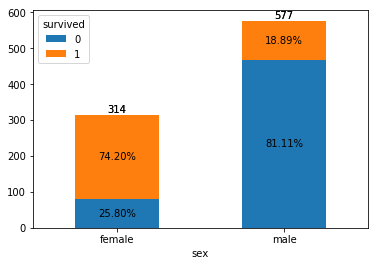

In [3]:
#绘制出堆积柱状图，然后将横坐标的显示端正
data_train_sex = data_train_new.groupby('sex')['survived'].value_counts()
data_train_sex = data_train_sex.unstack('survived')  #unstack表示不堆积：花括号转换为表格（如下输出）

data_train_sex.plot.bar(stacked=True) #stack在这里表示堆积。 另外：表格转为花括号
plt.xticks(rotation=0)


#for循环让其能够快速给每个堆积柱状图加上百分数
columns = len(data_train_sex[0])
for i in range(2):
    for j in range(columns):
        text_y = data_train_sex[i][j] / 2 + i * data_train_sex[0][j]
        strings = data_train_sex[i][j] / (data_train_sex[0][j] + data_train_sex[1][j])
        text_str = str("{:.2%}".format(strings))
        plt.text(j, text_y, text_str, ha='center', va='center')#显示百分数占比
        persons_sum = int(data_train_sex[0][j] + data_train_sex[1][j])
        plt.text(j, persons_sum, str(persons_sum), ha='center', va='bottom') #显示总人数
data_train_sex.head()    

# pclass:船舱号与生死的关系

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


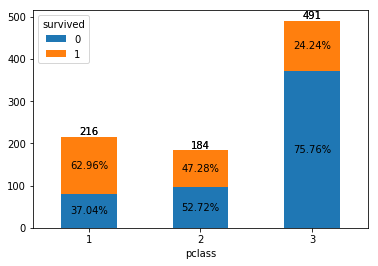

In [4]:
data_train_pclass = data_train_new.groupby('pclass')['survived'].value_counts()
data_train_pclass = data_train_pclass.unstack('survived')
data_train_pclass.plot.bar(stacked=True)
plt.xticks(rotation=0)

#data_train_pclass[0][3]   #表格有了具体的数值，就不再是从零开始的1,2,3了，表格显示多少就是多少

columns = len(data_train_pclass[0])
#print(columns)
for i in range(2):
    for j in range(1,columns+1):
        text_y = data_train_pclass[i][j] / 2 + i * data_train_pclass[0][j]
        strings = data_train_pclass[i][j] / (data_train_pclass[0][j] + data_train_pclass[1][j])
        text_str = str("{:.2%}".format(strings))
        plt.text(j-1, text_y, text_str, ha='center', va='center') 
        #在这里的x方向的定位，不能是j开始，应该是j-1，因为图的最左边以0开头
        
        persons_sum = int(data_train_pclass[0][j] + data_train_pclass[1][j])
        plt.text(j-1, persons_sum, str(persons_sum), ha='center', va='bottom')
        
data_train_pclass.head()

# age_bin:年龄段与生死的关系

survived,0,1
age_bin,,
"(-0.08, 16.0]",45,55
"(16.0, 32.0]",344,181
"(32.0, 48.0]",111,75
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


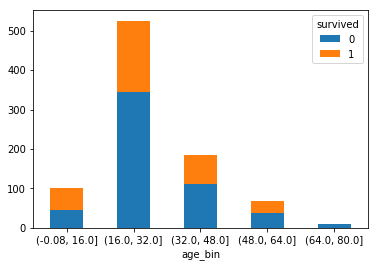

In [5]:
data_train_age = data_train_new.groupby('age_bin')['survived'].value_counts()
data_train_age = data_train_age.unstack('survived')
data_train_age.plot.bar(stacked=True)
plt.xticks(rotation=0)
data_train_age.head()

# fare_bin:船票与生死的关系

survived,0,1
fare_bin,,
"(-0.001, 7.91]",179,44
"(14.454, 31.0]",121,101
"(31.0, 512.329]",93,129
"(7.91, 14.454]",156,68


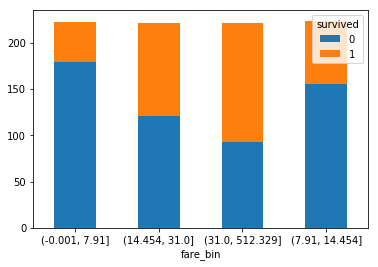

In [6]:
data_train_fare = data_train_new.groupby('fare_bin')['survived'].value_counts()
data_train_fare = data_train_fare.unstack('survived')
data_train_fare.plot.bar(stacked=True)
plt.xticks(rotation=0)
data_train_fare.head()

# title:称谓与生死的关系

survived,0,1
title,,
Master,17,23
Miss,55,127
Mr,436,81
Mrs,26,99
other,15,12


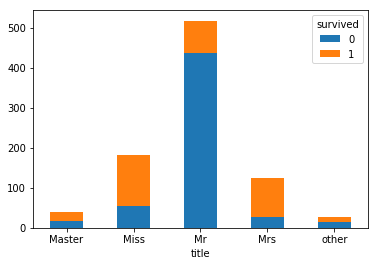

In [7]:
data_train_fare = data_train_new.groupby('title')['survived'].value_counts()
data_train_fare = data_train_fare.unstack('survived')
data_train_fare.plot.bar(stacked=True)
plt.xticks(rotation=0)
data_train_fare.head()

# single:是否单身与生死的关系, 0:非单身， 1：单身

survived,0,1
single,,
0,175,179
1,374,163


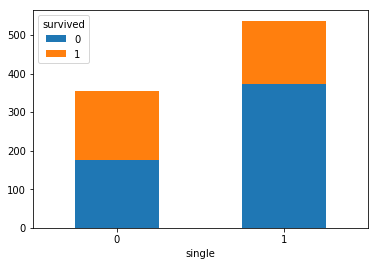

In [8]:
data_train_fare = data_train_new.groupby('single')['survived'].value_counts()
data_train_fare = data_train_fare.unstack('survived')
data_train_fare.plot.bar(stacked=True)
plt.xticks(rotation=0)
data_train_fare.head()

# family_size:家庭成员数量与生死的关系

survived,0,1
family_size,,
1,374.0,163.0
2,72.0,89.0
3,43.0,59.0
4,8.0,21.0
5,12.0,3.0


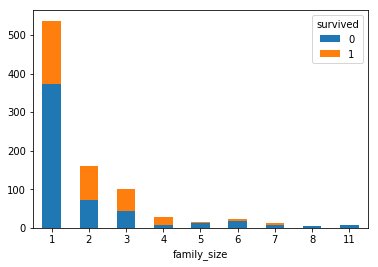

In [9]:
data_train_fare = data_train_new.groupby('family_size')['survived'].value_counts()
data_train_fare = data_train_fare.unstack('survived')
data_train_fare.plot.bar(stacked=True)
plt.xticks(rotation=0)
data_train_fare.head()

# embarked:上船的港口号与生死的关系

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,219


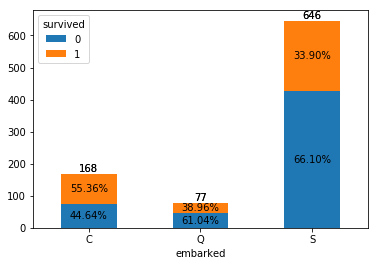

In [10]:
#绘制出堆积柱状图，然后将横坐标的显示端正
data_train_embarked = data_train_new.groupby('embarked')['survived'].value_counts()
data_train_embarked = data_train_embarked.unstack('survived') #unstack表示不堆积：花括号转换为表格（如下输出）
data_train_embarked.plot.bar(stacked=True)#stack在这里表示堆积。 另外：表格转为花括号
plt.xticks(rotation=0)  

#for循环让其能够快速给每个堆积柱状图加上百分数
columns = len(data_train_embarked[0]) 
for i in range(2):
    for j in range(columns):
        text_y = data_train_embarked[i][j] / 2 + i * data_train_embarked[0][j]
        strings = data_train_embarked[i][j] / (data_train_embarked[0][j] + data_train_embarked[1][j])
        text_str = str("{:.2%}".format(strings))
        plt.text(j, text_y, text_str, ha='center', va='center')#显示百分数占比
        
        persons_sum = int(data_train_embarked[0][j] + data_train_embarked[1][j])
        plt.text(j, persons_sum, str(persons_sum), ha='center', va='bottom')

data_train_embarked.head()